# Proyecto - Statistical Learning I
## DEPLOYMENT

Gustavo Alvarado. Carnet # 20063401

In [146]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.externals import joblib
import pickle
from sklearn import tree
import matplotlib.pyplot as plt
from scipy import stats

In [147]:
if tf.__version__.startswith("2."):
    import tensorflow.compat.v1 as tf
    tf.compat.v1.disable_v2_behavior()
    tf.compat.v1.disable_eager_execution()
    print("Enabled compatitility to tf1.x")

Enabled compatitility to tf1.x


In [22]:
#Cargando modelos 
model_dt = joblib.load('./models/DECISION_TREE-Age-SibSp-Parch-Embarked-Fare-passenger_class-passenger_sex-total_family-with_family-age_range-fare_range.pkl')
model_svm = joblib.load('./models/SVM-Age-SibSp-Parch-Embarked-Fare-passenger_class-passenger_sex-total_family-with_family-age_range-fare_range.pkl')
with open('./models/NAIVE_BAYES-Age-SibSp-Parch-Embarked-Fare-passenger_class-passenger_sex-total_family-with_family-age_range-fare_range.dat', 'rb') as f:
    model_nb = pickle.load(f)
model_lr = np.load("./models/LOGISTIC_REGRESSION-lr=0.01-reg=1e-09Age-SibSp-Parch-Embarked-Fare-passenger_class-passenger_sex-total_family-with_family-age_range-fare_range.npy", allow_pickle=True)

In [131]:
#Cargando data
titanic_data = pd.read_csv('final_data.csv')
titanic_data

x = titanic_data
y = x.pop('passenger_survived')

In [63]:
def P_x_given_y(x, mean_y, variance_y):
    P = 1/(np.sqrt(2*np.pi*variance_y)) * np.exp((-(x-mean_y)**2)/(2*variance_y))
    return P

In [132]:
#Predicción con modelo Decision Tree
y_pred_dt = model_dt.predict(x)
#Predicción con modelo SVM
y_pred_svm = model_svm.predict(x)
#Predicción con modelo Naive Bayes
y_pred_nb = y.to_frame()
y_pred_nb['P_one'] = model_nb['p_ones']
y_pred_nb['P_zero'] = model_nb['p_zeros']
y_pred_nb['prediction'] = -1
for i in range(0, len(x)):
    for j in range(len(x.columns) - 1):
        row_name = x.index[i]
        column_name = x.columns[j]
        x_one_mean = model_nb['means'].loc[1, column_name]
        x_one_var = model_nb['var'].loc[1, column_name]
        x_zero_mean = model_nb['means'].loc[0, column_name]
        x_zero_var = model_nb['var'].loc[0, column_name]
            
        y_pred_nb.loc[row_name, 'P_one'] *= P_x_given_y(x.loc[row_name, column_name], x_one_mean, x_one_var)
        y_pred_nb.loc[row_name, 'P_zero'] *= P_x_given_y(x.loc[row_name, column_name], x_zero_mean, x_zero_var)
            
        if y_pred_nb.loc[row_name, 'P_one'] > y_pred_nb.loc[row_name, 'P_zero']:
            y_pred_nb.loc[row_name, 'prediction'] = 1
        else:
            y_pred_nb.loc[row_name, 'prediction'] = 0
y_pred_nb = y_pred_nb['prediction']
#Predicción con modelo Linear Regression
x = x.values
x = np.c_[np.ones((len(x))), x]
tensor_w = tf.placeholder(tf.float32,[None, 1],"tensor_w")
tensor_x = tf.placeholder(tf.float32,[None, None],"tensor_x")
init = tf.global_variables_initializer() 
with tf.Session() as session:
    session.run(init)
    weights = model_lr
    logits = tf.matmul(tensor_x, weights)
    y_pred = tf.round(tf.nn.sigmoid(logits))
    y_pred_lr = session.run(y_pred, feed_dict={tensor_x:x, tensor_w:weights})

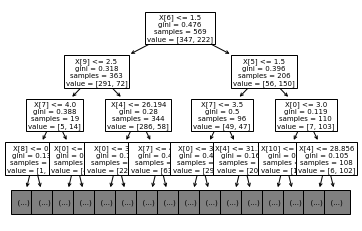

In [145]:
#Dibujando árbol de decisión
tree.plot_tree(model_dt, max_depth=3, fontsize=7)
plt.show()

In [181]:
def predict(i):
    #Modelo decision tree
    print('Prediction by Decision Tree:', 'Yes' if y_pred_dt[i] == 1 else 'No')
    #Modelo SVM
    print('Prediction by SVM:', 'Yes' if y_pred_svm[i] == 1 else 'No')
    #Modelo Naive bayes
    print('Prediction by Naive Bayes:', 'Yes' if y_pred_nb[i] == 1 else 'No')
    #Modelo Linear Regression
    print('Prediction by Linear Bayes:', 'Yes' if y_pred_lr[i][0] == 1 else 'No')
    print('-----------------------------------------')
    y_pred_el = stats.mode([y_pred_dt[i], y_pred_svm[i], y_pred_nb[i], y_pred_lr[i][0]])[0][0]
    print('Ensemble Learning Prediction:', 'Yes' if y_pred_el == 1 else 'No')
    print('-----------------------------------------')
    #Valor real
    print('Survived:', 'Yes' if y[i] == 1 else 'No')
    return 

## Predicciones

In [188]:
predict(10)

Prediction by Decision Tree: Yes
Prediction by SVM: Yes
Prediction by Naive Bayes: Yes
Prediction by Linear Bayes: Yes
-----------------------------------------
Ensemble Learning Prediction: Yes
-----------------------------------------
Survived: Yes


In [189]:
predict(100)

Prediction by Decision Tree: No
Prediction by SVM: Yes
Prediction by Naive Bayes: No
Prediction by Linear Bayes: No
-----------------------------------------
Ensemble Learning Prediction: No
-----------------------------------------
Survived: No


In [190]:
predict(500)

Prediction by Decision Tree: No
Prediction by SVM: No
Prediction by Naive Bayes: No
Prediction by Linear Bayes: No
-----------------------------------------
Ensemble Learning Prediction: No
-----------------------------------------
Survived: No


In [191]:
predict(654)

Prediction by Decision Tree: No
Prediction by SVM: Yes
Prediction by Naive Bayes: Yes
Prediction by Linear Bayes: Yes
-----------------------------------------
Ensemble Learning Prediction: Yes
-----------------------------------------
Survived: No


In [192]:
predict(239)

Prediction by Decision Tree: No
Prediction by SVM: No
Prediction by Naive Bayes: No
Prediction by Linear Bayes: No
-----------------------------------------
Ensemble Learning Prediction: No
-----------------------------------------
Survived: No


In [193]:
predict(444)

Prediction by Decision Tree: No
Prediction by SVM: No
Prediction by Naive Bayes: No
Prediction by Linear Bayes: No
-----------------------------------------
Ensemble Learning Prediction: No
-----------------------------------------
Survived: Yes


In [194]:
predict(83)

Prediction by Decision Tree: Yes
Prediction by SVM: No
Prediction by Naive Bayes: No
Prediction by Linear Bayes: Yes
-----------------------------------------
Ensemble Learning Prediction: No
-----------------------------------------
Survived: No


In [195]:
predict(777)

Prediction by Decision Tree: Yes
Prediction by SVM: Yes
Prediction by Naive Bayes: Yes
Prediction by Linear Bayes: Yes
-----------------------------------------
Ensemble Learning Prediction: Yes
-----------------------------------------
Survived: Yes


In [196]:
predict(333)

Prediction by Decision Tree: No
Prediction by SVM: No
Prediction by Naive Bayes: No
Prediction by Linear Bayes: No
-----------------------------------------
Ensemble Learning Prediction: No
-----------------------------------------
Survived: No


In [197]:
predict(50)

Prediction by Decision Tree: No
Prediction by SVM: No
Prediction by Naive Bayes: No
Prediction by Linear Bayes: No
-----------------------------------------
Ensemble Learning Prediction: No
-----------------------------------------
Survived: No
